In [ ]:
## Table 1. Characteristics of the participants with or without prevalent CH (N=4,189)

In [1]:
library(data.table)
library(ggplot2)
library(ggpubr)
library(cowplot)
theme_set(theme_cowplot())
library(dplyr)
library(tidyr)

# set working directory
setwd("/medpop/esp2/mesbah/projects/ch_progression/aric/pheno/")

# N = 4,189
aric_baseline_n_v05 <- fread("aric_baseline_n_v05_N10881.pheno_ch_status.23Mar2023.csv", header=T)
table(aric_baseline_n_v05$CH_baseline, exclude=NULL)

table(aric_baseline_n_v05$incident_CH, exclude=NULL)

# qcd CH variants with phenotypes
ch_var_in_baseline_qcd.pheno <- fread("ch_var_in_baseline_qcd_pheno.23Mar2023.csv", header = T)

## correct Lipid values
# aric_baseline_n_v05.v2 <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.31May2023.csv", header=T)


Attaching package: 'cowplot'


The following object is masked from 'package:ggpubr':

    get_legend



Attaching package: 'dplyr'


The following objects are masked from 'package:data.table':

    between, first, last


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union





   0    1 
3732  457 


   0    1 <NA> 
2997  735  457 

In [3]:
## corrected lipid values
lipids_base <- fread("aric_baseline_vanilla_02082023.csv", header=T, sep="\t")
str(lipids_base)
summary(lipids_base$ldl_base)

table(lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)

summary(lipids_base$ldl_base)

table(lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)

aric_baseline_n_v05.v2 <- merge(aric_baseline_n_v05, lipids_base, by.x="GWAS_ID", by.y = "gwasid")

lipids_base_n4187 <- subset(lipids_base, lipids_base$gwasid %in% aric_baseline_n_v05$GWAS_ID)
summary(lipids_base_n4187$ldl_base)
sd(lipids_base_n4187$ldl_base, na.rm = T)

summary(lipids_base_n4187$hdl_base)
sd(lipids_base_n4187$hdl_base, na.rm = T)

names(aric_baseline_n_v05.v2)
# fwrite(aric_baseline_n_v05.v2, "aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.31May2023.csv", 
  #   row.names = F, col.names = T, sep=",")

Classes 'data.table' and 'data.frame':	10881 obs. of  33 variables:
 $ gwasid       : chr  "A03873" "A11144" "A01476" "A02423" ...
 $ hg38_CRAM_ID : chr  "10047" "10382" "10566" "10665" ...
 $ aricid       : chr  "J136997" "J211628" "J201860" "J207189" ...
 $ Visit        : chr  "V01" "V01" "V01" "V01" ...
 $ sex_base     : chr  "F" "F" "F" "F" ...
 $ race_base    : chr  "B" "B" "B" "B" ...
 $ center_base  : chr  "J" "J" "J" "J" ...
 $ dob_base     : IDate, format: "1939-01-25" "1934-09-01" ...
 $ date_base    : IDate, format: "1987-06-29" "1988-07-25" ...
 $ age_base     : int  48 53 56 63 58 51 62 62 54 63 ...
 $ fast_8_base  : int  0 1 1 1 1 1 1 1 1 1 ...
 $ bmi_base     : num  30.5 30.4 27.3 24.8 29.1 ...
 $ dm_126_base  : int  0 0 0 0 1 0 0 NA 0 0 ...
 $ gluc_base    : num  105.8 86.9 95.3 90.4 128 ...
 $ htn_5_base   : int  1 0 1 0 1 0 0 1 1 1 ...
 $ chol_base    : num  255 253 196 244 328 256 196 NA 201 321 ...
 $ hdl_base     : num  87.6 36.6 49.1 79 53.9 ...
 $ ldl_base     : 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   108.5   130.4   132.7   154.4   467.4     210 


FALSE  TRUE 
 6692  4189 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.0   108.5   130.4   132.7   154.4   467.4     210 


FALSE  TRUE 
 6692  4189 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    9.8   107.9   128.4   130.6   151.0   396.8      74 

[1] 34.43004

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   5.00   40.00   50.00   51.99   62.00  141.00      15 

[1] 16.96835

[1] "GWAS_ID"              "ARIC_ID"              "GWASID_Visit"        
  [4] "cram_id"              "Visit.x"              "Gender"              
  [7] "Age"                  "CH_baseline"          "CH_v05"              
 [10] "incident_CH"          "incident_CHvaf05"     "incident_CHvaf10"    
 [13] "incident_DNMT3A"      "incident_TET2"        "incident_ASXL1"      
 [16] "incident_DTA"         "incident_SF"          "incident_DDR"        
 [19] "sex_v5"               "race_v5"              "center_v5"           
 [22] "dob_v5"               "date_v5"              "age_v5"              
 [25] "fast_8_v5"            "bmi_v5"               "dm_126_v5"           
 [28] "gluc_v5"              "htn_5_v5"             "chol_v5"             
 [31] "hdl_v5"               "ldl_v5"               "tg_v5"               
 [34] "chol_med_v5"          "statin_v5"            "cig_v5"              
 [37] "chd_v5"               "is_v5"                "hs_v5"               
 [40] "hf_v5"                "death.x"              "death_date.x"        
 [43] "bmi_v5_std"           "gluc_v5_std"          "chol_v5_std"         
 [46] "hdl_v5_std"           "ldl_v5_std"           "tg_v5_std"           
 [49] "non_hdl_v5_std"       "hg38_CRAM_ID.x"       "aricid.x"            
 [52] "Visit.y"              "sex"                  "race"                
 [55] "center"               "dob"                  "date_base.x"         
 [58] "age_base.x"           "fast_8_base.x"        "bmi_base.x"          
 [61] "dm_126_base.x"        "gluc_base.x"          "htn_5_base.x"        
 [64] "chol_base.x"          "hdl_base.x"           "ldl_base.x"          
 [67] "tg_base.x"            "chol_med_base.x"      "statin_base.x"       
 [70] "cig_base.x"           "chd_date.x"           "is_date.x"           
 [73] "hs_date.x"            "hf_date.x"            "death.y"             
 [76] "death_date.y"         "lfu_date.x"           "chd_base.x"          
 [79] "is_base.x"            "hs_base.x"            "hf_base.x"           
 [82] "ever_smoke"           "v2_vs_other"          "Sex"                 
 [85] "race_BW"              "BMI_cat"              "nonHDL_std"          
 [88] "hdl_base_std"         "ldl_base_std"         "chol_base_std"       
 [91] "tg_base_std"          "gluc_base_std"        "bmi_base_std"        
 [94] "CHvaf10_baseline"     "CH_baseline_v05"      "CHvaf10_baseline_v05"
 [97] "CH_DTA"               "CH_SF"                "CH_DDR"              
[100] "CH_DNMT3A"            "CH_TET2"              "CH_ASXL1"            
[103] "nonHDL_base_std"      "age_base_sqr"         "Center"              
[106] "hg38_CRAM_ID.y"       "aricid.y"             "Visit"               
[109] "sex_base"             "race_base"            "center_base"         
[112] "dob_base"             "date_base.y"          "age_base.y"          
[115] "fast_8_base.y"        "bmi_base.y"           "dm_126_base.y"       
[118] "gluc_base.y"          "htn_5_base.y"         "chol_base.y"         
[121] "hdl_base.y"           "ldl_base.y"           "tg_base.y"           
[124] "chol_med_base.y"      "statin_base.y"        "cig_base.y"          
[127] "chd_date.y"           "is_date.y"            "hs_date.y"           
[130] "hf_date.y"            "death"                "death_date"          
[133] "lfu_date.y"           "chd_base.y"           "is_base.y"           
[136] "hs_base.y"            "hf_base.y"

In [9]:
## SBP and DBP
bp_baseline <- fread("aric_baseline_bp_20230508.csv", header=T)
# summary(bp_baseline)
table(bp_baseline$gwasid %in% aric_baseline_n_v05$GWAS_ID, exclude=NULL)
table(bp_baseline$aricid %in% aric_baseline_n_v05$ARIC_ID, exclude=NULL)
aric_baseline_n_v05 <- merge(aric_baseline_n_v05, 
                             bp_baseline[,c(1,5,6)], 
                             by.x = "GWAS_ID", 
                             by.y="gwasid")
summary(aric_baseline_n_v05$dbp_base)
summary(aric_baseline_n_v05$sbp_base)

## Heme CA
hemeCA_baseline <- fread("aric_hem_cancer_20230507.csv", header=T)
# summary(hemeCA_baseline)
table(hemeCA_baseline$aricid %in% aric_baseline_n_v05$ARIC_ID, exclude=NULL)

aric_baseline_n_v05 <- merge(aric_baseline_n_v05, 
                             hemeCA_baseline[,c(1,17,18,19,20,21)], 
                             by.x="ARIC_ID", by.y = "aricid")

table(aric_baseline_n_v05$hem_can_inc_base, exclude = NULL)
table(aric_baseline_n_v05$hem_can_base, exclude = NULL)
aric_baseline_n_v05[which(aric_baseline_n_v05$hem_can_base==1),c(1,2)]


FALSE  TRUE 
 6692  4189 


FALSE  TRUE 
 6692  4189 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  39.00   66.00   72.00   72.41   79.00  124.00       2 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   62.0   107.0   117.0   118.4   127.0   220.0       2 


FALSE  TRUE 
11603  4189 


   0    1 <NA> 
3861   89  239 


   0    1 <NA> 
3950    2  237 

ARIC_ID,GWAS_ID
<chr>,<chr>
F159114,A02532
M311260,A15977


In [11]:
aric_baseline_n_v05$CH_DNMT3A <- ifelse(aric_baseline_n_v05$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="DNMT3A"], 1, 0)
aric_baseline_n_v05$CH_TET2 <- ifelse(aric_baseline_n_v05$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="TET2"], 1, 0)
aric_baseline_n_v05$CH_ASXL1 <- ifelse(aric_baseline_n_v05$GWAS_ID %in% ch_var_in_baseline_qcd.pheno$GWAS_ID[ch_var_in_baseline_qcd.pheno$Gene=="ASXL1"], 1, 0)
table(aric_baseline_n_v05$CH_DNMT3A)
table(aric_baseline_n_v05$CH_TET2)
table(aric_baseline_n_v05$CH_ASXL1)


   0    1 
3985  204 


   0    1 
4100   89 


   0    1 
4159   30 

In [12]:
## exclude prev. heme CA
aric_baseline_n_v05_noPrevHeme <- subset(aric_baseline_n_v05, aric_baseline_n_v05$hem_can_base==0 | is.na(aric_baseline_n_v05$hem_can_base) )
nrow(aric_baseline_n_v05_noPrevHeme)

[1] 4187

In [13]:
# fwrite(aric_baseline_n_v05, "aric_baseline_n_v05_N4189.pheno_ch_status.9May2023.csv", 
  #     row.names = F, col.names = T, sep=",")

# fwrite(aric_baseline_n_v05_noPrevHeme, "aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", 
  #     row.names = F, col.names = T, sep=",")

In [5]:
aric_baseline_n_v05_noPrevHeme <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", header=T)

In [6]:
table(aric_baseline_n_v05_noPrevHeme$incident_CH, exclude = NULL)



   0    1 <NA> 
2995  735  457 

In [3]:
nrow(aric_baseline_n_v05_noPrevHeme)
summary(aric_baseline_n_v05_noPrevHeme$Age - aric_baseline_n_v05_noPrevHeme$age_base)


[1] 4187

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   21.00   20.31   21.00   27.00 

In [17]:
table(!is.na(aric_baseline_n_v05_noPrevHeme$incident_CH))


FALSE  TRUE 
  457  3730 

In [19]:
table(aric_baseline_n_v05_noPrevHeme$CH_baseline, exclude = NULL)


   0    1 
3730  457 

In [29]:
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
cat("No prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
        digit=1, format="E")

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   47.0    52.0    57.0    57.2    61.0    80.0 

[1] 6

No prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   45.0    51.0    54.0    55.3    59.0    83.0 

[1] 5.4


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$age_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -6.436, df = 551.21, p-value = 2.668e-10
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.475381 -1.317726
sample estimates:
mean of x mean of y 
 55.26756  57.16411 


[1] "2.7E-10"

In [26]:
cat("Age Enrolment")
round(summary(aric_baseline_n_v05_noPrevHeme$age_base),1)
round(sd(aric_baseline_n_v05_noPrevHeme$age_base),1)

cat("Age Follow-up visit")
round(summary(aric_baseline_n_v05_noPrevHeme$Age),1)
round(sd(aric_baseline_n_v05_noPrevHeme$Age),1)

Age Enrolment

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   45.0    51.0    55.0    55.5    59.0    83.0 

[1] 5.5

Age Follow-up visit

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   67.0    71.0    75.0    75.8    80.0    90.0 

[1] 5.2

In [31]:
table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$CH_baseline==0])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]) )*100,1)

table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]) )*100,1)




   F    M 
2226 1504 


   F    M 
59.7 40.3 


  F   M 
252 205 


   F    M 
55.1 44.9 

In [20]:
table(aric_baseline_n_v05_noPrevHeme$Gender, 
      aric_baseline_n_v05_noPrevHeme$CH_baseline)

   
       0    1
  F 2226  252
  M 1504  205

In [21]:
# chisq.test(table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$Gender=="M"], aric_baseline_n_v05_noPrevHeme$CH_baseline[aric_baseline_n_v05_noPrevHeme$Gender=="M"]))

# chisq.test(table(aric_baseline_n_v05_noPrevHeme$Gender[aric_baseline_n_v05_noPrevHeme$Gender=="F"], aric_baseline_n_v05_noPrevHeme$CH_baseline[aric_baseline_n_v05_noPrevHeme$Gender=="F"]))

chisq.test(table(aric_baseline_n_v05_noPrevHeme$Gender, 
                 aric_baseline_n_v05_noPrevHeme$CH_baseline))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(aric_baseline_n_v05_noPrevHeme$Gender, aric_baseline_n_v05_noPrevHeme$CH_baseline)
X-squared = 3.2825, df = 1, p-value = 0.07002


In [32]:
table(aric_baseline_n_v05_noPrevHeme$race_BW[aric_baseline_n_v05_noPrevHeme$CH_baseline==0])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$race_BW[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]) )*100,1)

table(aric_baseline_n_v05_noPrevHeme$race_BW[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$race_BW[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]) )*100,1)



   B    W 
 865 2865 


   B    W 
23.2 76.8 


  B   W 
 86 371 


   B    W 
18.8 81.2 

In [22]:
chisq.test(table(aric_baseline_n_v05_noPrevHeme$race_BW, 
                 aric_baseline_n_v05_noPrevHeme$CH_baseline))


	Pearson's Chi-squared test with Yates' continuity correction

data:  table(aric_baseline_n_v05_noPrevHeme$race_BW, aric_baseline_n_v05_noPrevHeme$CH_baseline)
X-squared = 4.1874, df = 1, p-value = 0.04073


In [33]:
table(aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==0])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]) )*100,1)

table(aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]) )*100,1)

t.test(aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
1717 2004 


   0    1 
46.1 53.9 


  0   1 
191 265 


   0    1 
41.9 58.1 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$ever_smoke[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.7356, df = 574.63, p-value = 0.08318
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.090757420  0.005606522
sample estimates:
mean of x mean of y 
0.5385649 0.5811404 


In [36]:
round(summary(aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T) ,1)

round(summary(aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T) ,1)

t.test(aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   16.3    24.2    27.0    27.8    30.4    54.9       4 

[1] 5.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   15.9    24.2    26.8    27.6    30.3    55.0 

[1] 5.2


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$bmi_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 0.83609, df = 571.3, p-value = 0.4035
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.2882572  0.7155662
sample estimates:
mean of x mean of y 
 27.79745  27.58380 


In [37]:
round(summary(aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T) ,1)

round(summary(aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T) ,1)

t.test(aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   62.0   107.0   116.0   118.3   127.0   220.0       2 

[1] 16.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   78.0   108.0   118.0   119.5   128.0   213.0 

[1] 16.6


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$sbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.4767, df = 569.65, p-value = 0.1403
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.8208404  0.3995786
sample estimates:
mean of x mean of y 
 118.3019  119.5125 


In [38]:
round(summary(aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T) ,1)

round(summary(aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T) ,1)

t.test(aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   39.0    66.0    72.0    72.5    79.0   124.0       2 

[1] 9.8

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
     44      65      71      72      78     104 

[1] 9.7


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$dbp_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 0.94191, df = 577, p-value = 0.3466
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.4897648  1.3923710
sample estimates:
mean of x mean of y 
 72.46355  72.01225 


In [48]:
(table(aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
3526  197 


   0    1 
94.7  5.3 


  0   1 
422  34 


   0    1 
92.5  7.5 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$chol_med_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.6846, df = 538.86, p-value = 0.09264
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.046888909  0.003594735
sample estimates:
 mean of x  mean of y 
0.05291432 0.07456140 


In [50]:
(table(aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
2666 1056 


   0    1 
71.6 28.4 


  0   1 
319 138 


   0    1 
69.8 30.2 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$htn_5_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -0.80278, df = 569.15, p-value = 0.4224
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.06290482  0.02640295
sample estimates:
mean of x mean of y 
0.2837184 0.3019694 


In [51]:
(table(aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
3413  305 


   0    1 
91.8  8.2 


  0   1 
410  44 


   0    1 
90.3  9.7 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$dm_126_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.0186, df = 552.24, p-value = 0.3088
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.04358199  0.01381609
sample estimates:
 mean of x  mean of y 
0.08203335 0.09691630 


In [53]:
(table(aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
3614  116 


   0    1 
96.9  3.1 


  0   1 
446  11 


   0    1 
97.6  2.4 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$chd_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 0.91054, df = 608.44, p-value = 0.3629
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008131481  0.022189829
sample estimates:
 mean of x  mean of y 
0.03109920 0.02407002 


In [54]:
(table(aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
3610   38 


 0  1 
99  1 


  0   1 
438   4 


   0    1 
99.1  0.9 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$is_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 0.28402, df = 570.78, p-value = 0.7765
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.008085812  0.010819597
sample estimates:
  mean of x   mean of y 
0.010416667 0.009049774 


In [55]:
(table(aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]))*100 ,1)

(table(aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))
round(prop.table(table(aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]))*100 ,1)

t.test(aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])


   0    1 
3573  103 


   0    1 
97.2  2.8 


  0   1 
438  10 


   0    1 
97.8  2.2 


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$hf_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 0.75987, df = 591.34, p-value = 0.4476
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.009029387  0.020425703
sample estimates:
 mean of x  mean of y 
0.02801959 0.02232143 


## Corrected Lipid values

In [2]:
## updated lipids
aric_baseline_n_v05_noPrevHeme.v2 <- fread("../epi/aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.correct_lipids.31May2023.csv", header=T)

str(aric_baseline_n_v05_noPrevHeme.v2)

Classes 'data.table' and 'data.frame':	4187 obs. of  145 variables:
 $ GWAS_ID             : chr  "A00004" "A00009" "A00012" "A00013" ...
 $ ARIC_ID             : chr  "M102321" "F101210" "W121907" "M263966" ...
 $ GWASID_Visit        : chr  "A00004_V05" "A00009_V05" "A00012_V05" "A00013_V05" ...
 $ cram_id             : chr  "H5TH7DSX2-2-IDUDI0072" "HNTCYDSX2-2-IDUDI0060" "HNTGWDSX2-1-IDUDI0006" "HKNWTDSX2-3-IDUDI0063" ...
 $ Visit.x             : chr  "V05" "V05" "V05" "V05" ...
 $ Gender              : chr  "F" "F" "F" "M" ...
 $ Age                 : int  71 76 79 82 82 83 71 71 77 84 ...
 $ CH_baseline         : int  1 0 0 1 0 0 0 0 0 0 ...
 $ CH_v05              : int  1 0 0 1 0 0 0 0 0 0 ...
 $ incident_CH         : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf05    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_CHvaf10    : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_DNMT3A     : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_TET2       : int  NA 0 0 NA 0 0 0 0 0 0 ...
 $ incident_

In [3]:
cat("Total Chol")
cat("no prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])$p.value,
        digit=1, format="E")

Total Cholno prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  101.0   183.0   205.0   207.9   230.0   461.0       5 

[1] 36.3

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  113.0   185.0   208.0   209.7   231.0   357.0 

[1] 38.1


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme.v2$chol_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 1]
t = -0.94413, df = 562.24, p-value = 0.3455
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.467324  1.917606
sample estimates:
mean of x mean of y 
 207.8939  209.6688 


[1] "3.5E-01"

In [8]:
cat("LDL\n no prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])$p.value,
        digit=1, format="E")

LDL
 no prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    9.8   107.8   128.4   130.5   150.8   396.8      65 

[1] 34.4

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   28.2   108.5   129.0   131.3   152.2   280.6       9 

[1] 35


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme.v2$ldl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 1]
t = -0.45384, df = 557.37, p-value = 0.6501
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -4.231643  2.643199
sample estimates:
mean of x mean of y 
 130.5468  131.3410 


[1] "6.5E-01"

In [9]:
cat("HDL\n no prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])$p.value,
        digit=1, format="E")

HDL
 no prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
      5      40      50      52      62     128      14 

[1] 16.9

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   21.0    39.0    48.0    51.7    61.0   141.0       1 

[1] 17.9


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme.v2$hdl_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 1]
t = 0.42487, df = 559, p-value = 0.6711
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.356629  2.105510
sample estimates:
mean of x mean of y 
 52.03529  51.66085 


[1] "6.7E-01"

In [4]:
cat("TG: median (IQR)\n no prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)
round(mad(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)
round(IQR(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], na.rm = T),1)


cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)
round(mad(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)
round(IQR(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1], na.rm = T),1)

## 
wilcox.test(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])

formatC(wilcox.test(aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline==1])$p.value,
        digit=1, format="E")

TG: median (IQR)
 no prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   29.0    79.0   109.0   128.6   154.0  1634.9       5 

[1] 84.5

[1] 51.9

[1] 75

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   40.0    82.0   119.0   135.7   158.0   706.0 

[1] 79.8

[1] 54.9

[1] 76


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme.v2$tg_base.y[aric_baseline_n_v05_noPrevHeme.v2$CH_baseline == 1]
W = 795894, p-value = 0.02328
alternative hypothesis: true location shift is not equal to 0


[1] "2.3E-02"

In [60]:
# cat("no prev ch")
# round(summary(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
# round(sd(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T),1)
# cat("prev ch")
# round(summary(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
# round(sd(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T),1)

## 
# t.test(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
  #     aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

# formatC(t.test(aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
   #    aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
    #    digit=1, format="E")

no prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.6     4.7     5.3     7.8     6.0   255.3       5 

[1] 22.3

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    2.9     4.8     5.4    10.3     6.1   215.9 

[1] 30


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$chol_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.7119, df = 519.42, p-value = 0.08751
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.3298939  0.3662699
sample estimates:
mean of x mean of y 
 7.831479 10.313291 


[1] "8.8E-02"

In [61]:
# cat("No prev ch")
# round(summary(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
# round(sd(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T),1)
# cat("prev ch")
# round(summary(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
# round(sd(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T),1)

## 
# t.test(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
  #      aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

# formatC(t.test(aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
  #     aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
   #     digit=1, format="E")

Ni prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     2.8     3.3     5.0     3.9   180.0      65 

[1] 14.5

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.7     2.8     3.4     6.5     4.0   152.2       9 

[1] 19.2


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$ldl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.6722, df = 510.83, p-value = 0.09509
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -3.4141458  0.2744856
sample estimates:
mean of x mean of y 
 4.970567  6.540397 


[1] "9.5E-02"

In [62]:
cat("No prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
        digit=1, format="E")

No prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.1     1.0     1.3     1.9     1.6   102.0      14 

[1] 5.4

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.5     1.0     1.3     2.4     1.7    75.0       1 

[1] 6.7


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$hdl_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.4415, df = 530.64, p-value = 0.15
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -1.1156732  0.1713047
sample estimates:
mean of x mean of y 
 1.926500  2.398684 


[1] "1.5E-01"

In [64]:
cat("No prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
        digit=1, format="E")

No prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     0.9     1.2     3.0     1.8   352.5       5 

[1] 15.6

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    0.5     0.9     1.4     5.6     1.9   345.3 

[1] 28.9


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$tg_base[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = -1.8378, df = 488.88, p-value = 0.0667
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -5.2372104  0.1749408
sample estimates:
mean of x mean of y 
 3.038511  5.569646 


[1] "6.7E-02"

In [65]:
aric_baseline_n_v05_noPrevHeme$dAge <- (aric_baseline_n_v05_noPrevHeme$Age - aric_baseline_n_v05_noPrevHeme$age_base)
cat("No prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==0]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], na.rm = T),1)
cat("prev ch")
round(summary(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==1]),1)
round(sd(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==1], na.rm = T),1)

## 
t.test(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])

formatC(t.test(aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==0], 
       aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline==1])$p.value,
        digit=1, format="E")

No prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    5.0    20.0    21.0    20.3    21.0    26.0 

[1] 2

prev ch

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
    6.0    19.0    20.0    20.1    21.0    27.0 

[1] 2.4


	Welch Two Sample t-test

data:  aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline == 0] and aric_baseline_n_v05_noPrevHeme$dAge[aric_baseline_n_v05_noPrevHeme$CH_baseline == 1]
t = 1.8393, df = 533.41, p-value = 0.06642
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.01470838  0.44719089
sample estimates:
mean of x mean of y 
 20.33003  20.11379 


[1] "6.6E-02"

## Table 2. Characteristics of the participants (N=3,730) without prevalent CH

In [7]:
 # Exclude participants with Prev CH
aric_baseline_n_v05_noPrevHeme <- fread("aric_baseline_n_v05_N4187.pheno_ch_status.noHemeCA.9May2023.csv", header=T)
aric_baseline_n_v05 <- subset(aric_baseline_n_v05_noPrevHeme, !is.na(aric_baseline_n_v05_noPrevHeme$incident_CH))
str(aric_baseline_n_v05)

Classes 'data.table' and 'data.frame':	3730 obs. of  112 variables:
 $ ARIC_ID             : chr  "F100601" "F100785" "F100920" "F101108" ...
 $ GWAS_ID             : chr  "A09377" "A07720" "A14695" "A01650" ...
 $ GWASID_Visit        : chr  "A09377_V05" "A07720_V05" "A14695_V05" "A01650_V05" ...
 $ cram_id             : chr  "HW2Y3DSX2-3-IDUDI0054" "HYV73DSXY-3-IDUDI0054" "HY2KGDSX2-2-IDUDI0058" "H257KDSX3-3-IDUDI0068" ...
 $ Visit.x             : chr  "V05" "V05" "V05" "V05" ...
 $ Gender              : chr  "F" "F" "F" "M" ...
 $ Age                 : int  83 75 83 83 76 76 70 87 82 77 ...
 $ CH_baseline         : int  0 0 0 0 0 0 0 0 0 0 ...
 $ CH_v05              : int  1 0 1 1 0 0 1 0 0 1 ...
 $ incident_CH         : int  1 0 1 1 0 0 1 0 0 1 ...
 $ incident_CHvaf05    : int  1 0 1 1 0 0 1 0 0 1 ...
 $ incident_CHvaf10    : int  1 0 1 NA 0 0 NA 0 0 1 ...
 $ incident_DNMT3A     : int  1 0 1 0 0 0 1 0 0 0 ...
 $ incident_TET2       : int  0 0 0 0 0 0 0 0 0 1 ...
 $ incident_ASXL1   

In [10]:
table(aric_baseline_n_v05$incident_CH, exclude = NULL)
round(prop.table(table(aric_baseline_n_v05$incident_CH, exclude = NULL))*100,1)

table(aric_baseline_n_v05$incident_CHvaf10, exclude = NULL)
prop.table(table(aric_baseline_n_v05$incident_CHvaf10, exclude = NULL))


   0    1 
2995  735 


   0    1 
80.3 19.7 


   0    1 <NA> 
2995  272  463 


         0          1       <NA> 
0.80294906 0.07292225 0.12412869 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   51.00   56.00   56.09   60.00   70.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  45.00   51.00   54.00   55.07   59.00   83.00 


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH == 1] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH == 0]
W = 1220168, p-value = 2.371e-06
alternative hypothesis: true location shift is greater than 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH == 1] and aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH == 0]
t = 4.4465, df = 1084.2, p-value = 4.814e-06
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.6427516       Inf
sample estimates:
mean of x mean of y 
 56.08707  55.06644 


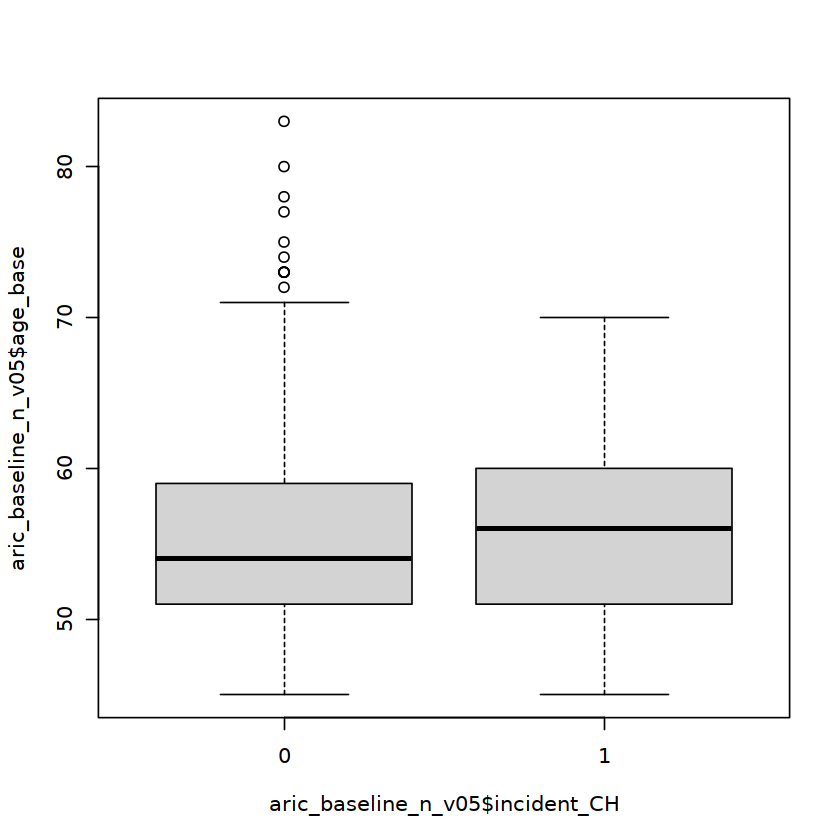

In [15]:
## Age at enrolment
summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==1])
summary(aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==0])
boxplot(aric_baseline_n_v05$age_base ~ aric_baseline_n_v05$incident_CH)

wilcox.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==1],
            aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==0], alternative="g")

t.test(aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==1],
            aric_baseline_n_v05$age_base[aric_baseline_n_v05$incident_CH==0], alternative="g")


	Wilcoxon rank sum test with continuity correction

data:  aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH == 1] and aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH == 0]
W = 1248940, p-value = 6.817e-09
alternative hypothesis: true location shift is greater than 0



	Welch Two Sample t-test

data:  aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH == 1] and aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH == 0]
t = 5.6693, df = 1075.3, p-value = 9.207e-09
alternative hypothesis: true difference in means is greater than 0
95 percent confidence interval:
 0.8810833       Inf
sample estimates:
mean of x mean of y 
 76.59456  75.35292 


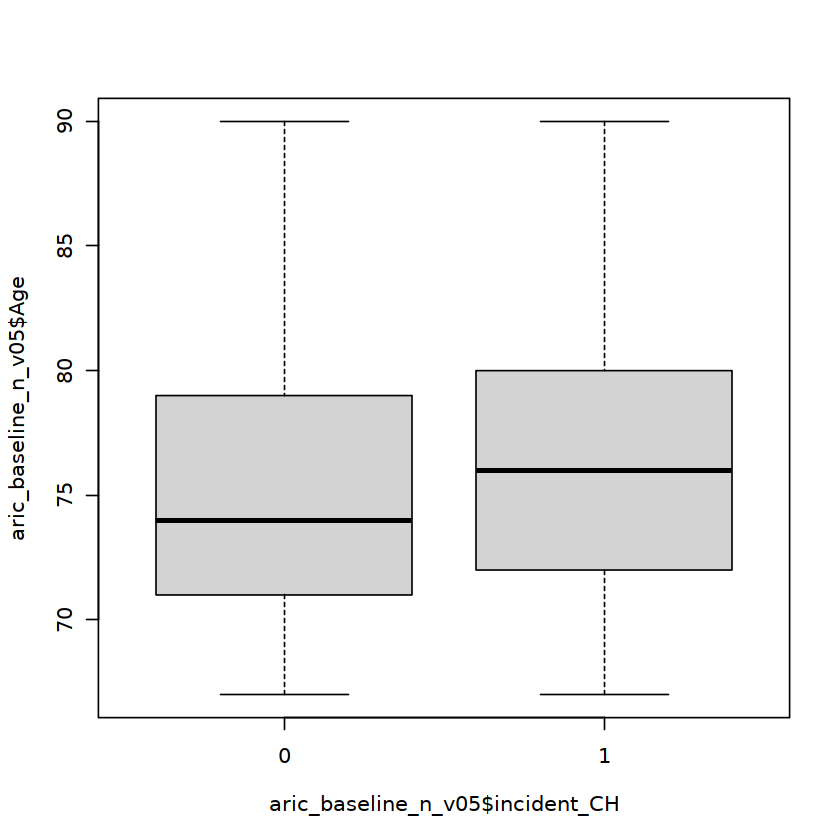

In [14]:
boxplot(aric_baseline_n_v05$Age ~ aric_baseline_n_v05$incident_CH)

wilcox.test(aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH==1],
            aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH==0], alternative="g")

t.test(aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH==1],
            aric_baseline_n_v05$Age[aric_baseline_n_v05$incident_CH==0], alternative="g")

In [4]:
# Age
round(summary(aric_baseline_n_v05$age_base),1)

table(aric_baseline_n_v05$race_BW, aric_baseline_n_v05$Gender)

table(aric_baseline_n_v05$Gender)
round(prop.table(table( aric_baseline_n_v05$Gender))*100,1)

table(aric_baseline_n_v05$race_BW)
round(prop.table(table( aric_baseline_n_v05$race_BW))*100,1)

table(aric_baseline_n_v05$ever_smoke)
round(prop.table(table( aric_baseline_n_v05$ever_smoke))*100,1)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   45.0    51.0    54.0    55.3    59.0    83.0 

   
       F    M
  B  578  287
  W 1648 1217


   F    M 
2226 1504 


   F    M 
59.7 40.3 


   B    W 
 865 2865 


   B    W 
23.2 76.8 


   0    1 
1717 2004 


   0    1 
46.1 53.9 

In [5]:
round(summary(aric_baseline_n_v05$bmi_base),1)
round(sd(aric_baseline_n_v05$bmi_base,na.rm = T),1)

round(summary(aric_baseline_n_v05$sbp_base),1)
round(sd(aric_baseline_n_v05$sbp_base,na.rm = T),1)

round(summary(aric_baseline_n_v05$dbp_base),1)
round(sd(aric_baseline_n_v05$dbp_base,na.rm = T),1)



   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   16.3    24.2    27.0    27.8    30.4    54.9       4 

[1] 5.1

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   62.0   107.0   116.0   118.3   127.0   220.0       2 

[1] 16.3

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   39.0    66.0    72.0    72.5    79.0   124.0       2 

[1] 9.8

In [7]:
### chol med
table(aric_baseline_n_v05$chol_med_base)
round(prop.table(table(aric_baseline_n_v05$chol_med_base))*100,1)


# lipids
# chol_base
cat("total chol")
round(summary(aric_baseline_n_v05$chol_base),1)

round(sd(aric_baseline_n_v05$chol_base, na.rm = T),1)

# ldl_base
cat("LDL")
round(summary(aric_baseline_n_v05$ldl_base),1)

round(sd(aric_baseline_n_v05$ldl_base, na.rm = T),1)


# hdl_base
cat("hdl")
round(summary(aric_baseline_n_v05$hdl_base),1)

round(sd(aric_baseline_n_v05$hdl_base, na.rm = T),1)

# tg_base
cat("tg")
round(summary(aric_baseline_n_v05$tg_base),1)

round(sd(aric_baseline_n_v05$tg_base, na.rm = T),1)




   0    1 
3526  197 


   0    1 
94.7  5.3 

total chol

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    2.6     4.7     5.3     7.8     6.0   255.3       5 

[1] 22.3

LDL

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     2.8     3.3     5.0     3.9   180.0      65 

[1] 14.5

hdl

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.1     1.0     1.3     1.9     1.6   102.0      14 

[1] 5.4

tg

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
    0.3     0.9     1.2     3.0     1.8   352.5       5 

[1] 15.6

In [8]:
summary(aric_baseline_n_v05$Age - aric_baseline_n_v05$age_base)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   5.00   20.00   21.00   20.33   21.00   26.00 

In [10]:
### 
# Clinical traits
# dm_126_base, htn_5_base,  chol_med_base, hf_base, chd_base, is_base, hs_base, 
cat("chd_base")
table(aric_baseline_n_v05$chd_base)
round(prop.table(table(aric_baseline_n_v05$chd_base))*100,1)

##
cat("dm_126_base")
table(aric_baseline_n_v05$dm_126_base)
round(prop.table(table(aric_baseline_n_v05$dm_126_base))*100,1)


##
# Clinical traits
# htn_5_base,  hf_base, is_base, hs_base, 
cat("htn_5_base")
table(aric_baseline_n_v05$htn_5_base)
round(prop.table(table(aric_baseline_n_v05$htn_5_base))*100,1)


# Clinical traits
# hf_base, is_base, 
cat("hf_base")
table(aric_baseline_n_v05$hf_base)
round(prop.table(table(aric_baseline_n_v05$hf_base))*100,1)


##
# Clinical traits
#  is_base, 

cat("is_base")
table(aric_baseline_n_v05$is_base)
round(prop.table(table(aric_baseline_n_v05$is_base))*100,2)

chd_base


   0    1 
3614  116 


   0    1 
96.9  3.1 

dm_126_base


   0    1 
3413  305 


   0    1 
91.8  8.2 

htn_5_base


   0    1 
2666 1056 


   0    1 
71.6 28.4 

hf_base


   0    1 
3573  103 


   0    1 
97.2  2.8 

is_base


   0    1 
3610   38 


    0     1 
98.96  1.04 